# What is Linear Classification?

Imagine that you have two point clouds that you want to classify, what solution do you propose? The idea that logistic regression proposes is to separate them with a straight line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import dprocessing as dp
%matplotlib inline

In [2]:
sns.set()

In [3]:
np.random.seed(1995)

In [4]:
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [2 + np.random.normal() for i in range(20)] + [4 + np.random.normal() for i in range(20)]
z = ['Stark'] * 20 + ['Bolton'] * 20
data = pd.DataFrame({'x' : x, 'y' : y, 'Type' : z})
data.head()

,x,y,Type
0,2.759367,3.450856,Stark
1,2.529421,4.037920,Stark
2,6.101191,2.030075,Stark
3,2.535178,1.790706,Stark
4,4.817922,0.162836,Stark


In [9]:
def linear_classification(line = False, point1 = False, point2 = False, point3 = False):
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'Type', ax = ax)
    
    if line:
        ax.plot([0, data['x'].max()], [0, data['x'].max()])
        
    if point1:
        ax.plot([4], [2], markersize = 15, marker = '*', color = 'g')
        
    if point2:
        ax.plot([2], [4], markersize = 15, marker = '*', color = 'g')
        
    if point3:
        ax.plot([4], [4], markersize = 15, marker = '*', color = 'g')

In [10]:
interact(linear_classification, line = False, point1 = False, point2 = False, point3 = False);

interactive(children=(Checkbox(value=False, description='line'), Checkbox(value=False, description='point1'), …

We can solve this problem by defining $h$ as follows:

$$h(x, y) = x - y$$

- If $h > 0$ → Stark
- If $h < 0$ → Bolton

# Biological inspiration


This model, strange as it may seem, can be interpreted as a neuron, if we observe a neuron in our brain we will see that it is made up of several denditres and an axon, the neuron connects its axon to the denditres of another neuron, and in turn has several neurons connected to their own denditras.

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/1024px-Blausen_0657_MultipolarNeuron.png>

So a neuron receives information from several more neurons, but only sends a result (through the axon) to another, that is, the neuron has several inputs but only has one output. Like the previous model that receives two inputs ($x$, $y$) and a single output ($Stark$ / $Bolton$ depending on the case).

<hr>

# From linear regression to logistics regression


The first idea that we could have when trying to model the above would be to use the probability that a point is Stark or Bolton and use what we already know, linear regression to model it.

$$P = \alpha + \beta X$$

But something is wrong, here $P \in [0, 1]$ but in the right side $X \in (- \infty, \infty)$, so we still have a proiblem. What if we use the odds ratio?, the odds ratio is defined as follows: 

$$Odds_{P} = \frac{P}{1 - P}$$

if we use the odds ratio instead of probability our model would be as follows:

$$\frac{P}{1 - P} = \alpha + \beta X$$


Notice when the numerator tends to 0 (the probability of success tends to 0) the odds ratio tends to 0. In the other hand when the numerator is bigger than the denominator, the odds ratio is bigger than one, even more so if the denominator tends to 0 (the probability of failure tends to 0 or the probability of success tends to 1) the odds ratio tend to $\infty$. Thus the odds ratio is a real number in the $[0, \infty)$, but in the right side of our equation we still have $X \in (- \infty, \infty)$, the problem still there.


So let's take a look at the function $\ln$.

In [11]:
x = np.linspace(0.0001, 100, 1000)
y = np.log(x) #remember np.log is the logarithm base e

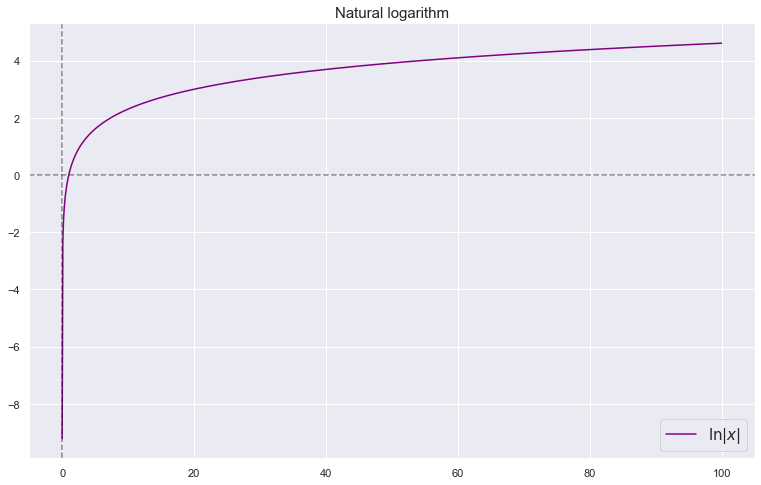

In [12]:
fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(x, y, color = 'purple', label = '$\\ln |x|$')
ax.axvline(0, linestyle = '--', color = 'k', alpha = 0.5)
ax.axhline(0, linestyle = '--', color = 'k', alpha = 0.5)
ax.set_title('Natural logarithm', fontsize = 15)
ax.legend(prop = {'size' : 15});


$$\ln \left| \frac{P}{1 - P} \right| =  \alpha + \beta X$$

Finally $\ln \left| \frac{P}{1 - P} \right| \in (- \infty, \infty)$ and $X \in (- \infty, \infty)$ and:


Maybe you're thinking that the $\ln$ is not look like a straight line, and you are right, but don't forget the for of the form of the odds.

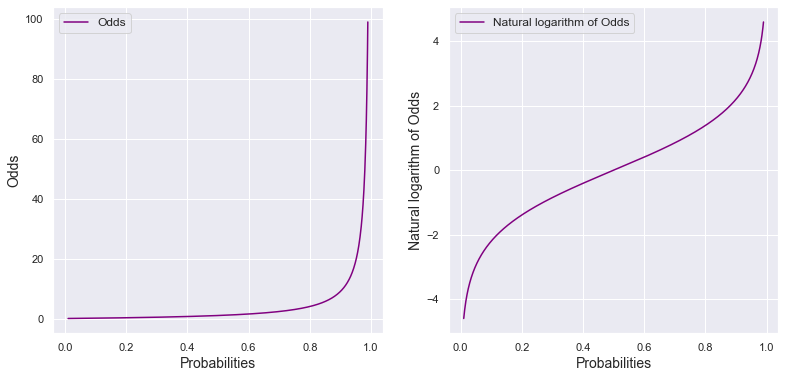

In [13]:
p = np.linspace(0.01, 0.99, 1000)
odds = p / (1 - p)
ln = np.log(odds)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))

ax[0].plot(p, odds, color = 'purple', label = 'Odds')
ax[0].set_xlabel('Probabilities', fontsize = 14)
ax[0].set_ylabel('Odds', fontsize = 14)
ax[0].legend(prop = {'size' : 12})

ax[1].plot(p, ln, color = 'purple', label = 'Natural logarithm of Odds')
ax[1].set_xlabel('Probabilities', fontsize = 14)
ax[1].set_ylabel('Natural logarithm of Odds', fontsize = 14)
ax[1].legend(prop = {'size' : 12});

we can solve for P: 

$$\ln \left| \frac{P}{1 - P} \right|=  \alpha + \beta X$$


Apply the exponential function:

$$\frac{P}{1 - P} = e^{\alpha + \beta X}$$


multiply by $(1 - P)$

$$P = e^{\alpha + \beta X} (1 - P)$$
$$P = e^{\alpha + \beta X}  - P e^{\alpha + \beta X}$$


Add $P e^{\alpha + \beta X}$

$$P + P e^{\alpha + \beta X} = e^{\alpha + \beta X}$$

$$P (1 + e^{\alpha + \beta X}) = e^{\alpha + \beta X}$$


Divide by $(1 + e^{\alpha + \beta X})$

$$P = \frac{e^{\alpha + \beta X}}{1 + e^{\alpha + \beta X}}$$

And finally apply a sneaky 1:

$$P = \frac{e^{-(\alpha + \beta X)}}{e^{-(\alpha + \beta X)}}\frac{e^{\alpha + \beta X}}{1 + e^{\alpha + \beta X}}$$

$$P = \frac{1}{1 + e^{-(\alpha + \beta X)}}$$



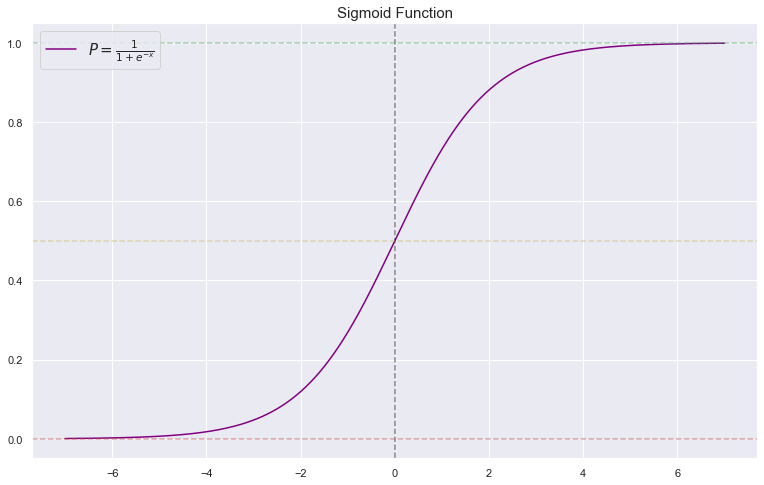

In [14]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(-7, 7, 1000)
y = 1 / (1 + np.exp(-x))

ax.plot(x, y, color = 'purple', label = '$P = \\frac{1}{1 + e^{-x}}$')
ax.axvline(0, linestyle = '--', color = 'k', alpha = 0.5)
ax.axhline(0, linestyle = '--', color = 'r', alpha = 0.5)
ax.axhline(0.5, linestyle = '--', color = 'y', alpha = 0.5)
ax.axhline(1, linestyle = '--', color = 'g', alpha = 0.5)
ax.set_title('Sigmoid Function', fontsize = 15)
ax.legend(prop = {'size' : 15});

In the case of multiple predictor variables we would have:

$$\ln \left| \frac{P}{1 - P} \right| =  w_0 + w_1 X_1 + \cdots + w_k X_k$$

And we can define two vectors:

$$\vec{w}
=
\begin{bmatrix}
w_0\\
w_1\\
\vdots \\
w_k \\
\end{bmatrix}
$$


$$\vec{X}
=
\begin{bmatrix}
1\\
X_1\\
\vdots \\
X_k \\
\end{bmatrix}
$$

Thus:

$$\ln \left| \frac{P}{1 - P} \right| = w^T X$$

$$P = \frac{1}{1 + e^{-(w^T X)}}$$

# How we estimate the $\vec{w}$

Every time we fit a statistical or machine learning model, we are estimating parameters.A single variable linear regression has the equation:

$Y = w_0 + w_1 X$

Our goal when we fit this model is to estimate the parameters  $w_0$ and $w_1$ given our observed values of $Y$ and $X$. We use Ordinary Least Squares (OLS) to fit the linear regression model and estimate $w_0$ and $w_1$.

- **Can we use OLS to estimate the $\vec{w}$?**

The answer is **No**. So we need to change cost function, now we will focus on the cross-error entropy function call.

$$j = - \left[y \ln(P) + (1 - y) \ln(1 - P) \right]$$

In [15]:
def j(y, p):
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))

In [16]:
j(1, 0)

<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))


inf

In [17]:
j(0, 1)

<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))


inf

In [18]:
j(0, 0)

<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))


nan

In [19]:
j(1, 1)

<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-15-b82060e7f6c9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return - (y * np.log(p) + (1 - y) * np.log(1 - p))


nan

In [21]:
j(1, 0.99)

0.01005033585350145

In [22]:
j(1, 0.5)

0.6931471805599453

In [24]:
j(1, 0.001)

6.907755278982137

As you can see, this metric is smaller the smaller the error we make with our prediction, so we can reuse the above to build a function to minimize.

$$J = - \sum \left[y_n \ln(P_n) + (1 - y_n) \ln(1 - P_n) \right]$$

To minimize the previous function we can use the descent of the gradient but for this we need to know what the gradient is, but first we must remember that P is a function of $w^T X$ and this in turn of $w_i$.

$$P = \frac{1}{1 + e^{-(w^T X)}}$$


So if we use the chain rule we can express the derivative of $J$ with respect to $w_i$ as:

$$\frac{\partial J}{\partial w_i} = \sum \frac{\partial J}{\partial P_n}\frac{\partial P_n}{\partial \alpha_n}\frac{\partial \alpha_n}{\partial w_i}$$

where $\alpha$ is:


$$\alpha_i = w^T x_i$$

If we calculate each of the individual derivatives we have:

$$
\left \{
\begin{array}{l}
\frac{\partial J}{\partial P_n} = -\left[\frac{y_n}{p_n} - \frac{1 - y_n}{1 - p_n}\right]\\
\frac{\partial P_i}{\partial \alpha_n} = \frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_n})(- 1)\\
\frac{\partial \alpha_n}{\partial w_i} = x_{ni}
\end{array}
\right.
$$



The second derivative can be simplified

$$\frac{\partial P_i}{\partial \alpha_i} = \frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_i})(- 1)$$
<hr>
$$\frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_i})(- 1) = \frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})^2}$$
<hr>
$$\frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})^2} = \frac{1}{1 + e^{-(w^T X)}} \frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})}$$

Finally notice that:

$$1 - P_i = 1 - \frac{1}{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}}$$

$$1 - P_i = \frac{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}}{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}} - \frac{1}{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}}$$

$$1 - P_i = \frac{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})} - 1}{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}}$$

<div class="alert alert-danger">$$1 - P_i = \frac{e^{-(\vec{w} \cdot \vec{X}_{ui})}}{1 + e^{-(\vec{w} \cdot \vec{X}_{ui})}}$$</div>


So.


$$
\left \{
\begin{array}{l}
\frac{\partial J}{\partial P_i} = -\left[\frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i}\right]\\
\frac{\partial P_i}{\partial \alpha_i} = P_i (1 - P_i)\\
\frac{\partial \alpha_i}{\partial w_i} = x_{ni}
\end{array}
\right.
$$


Putting them all together:

$$\frac{\partial J}{\partial w_i} = - \sum \left[ \frac{y_i}{P_i} P_i(1 - P_i)x_{ni} - \frac{1 - y_i}{1 - p_i} P_i (1 - P_i) x_{ni}\right]$$



$$\frac{\partial J}{\partial w_i} = - \sum \left[ y_i(1 - P_i)x_{ni} - (1 - y_i) P_i  x_{ni}\right]$$

$$\frac{\partial J}{\partial w_i} = - \sum \left[ (y_i - y_iP_i - P_i + y_iP_i)  x_{ni}\right]$$


$$\frac{\partial J}{\partial w_i} = - \sum(y_i  - P_i)  x_{ni}$$

$$\frac{\partial J}{\partial w_i} =  \sum(P_i  - y_i)  x_{ni}$$

<hr>

$$\frac{\partial J}{\partial \vec{w}} =  \sum(P_i  - y_i)  \vec{x_n}$$


<hr>

$$\nabla J =  X^T (P  - y)$$

In [25]:
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x' : x, 'y' : y, 'Type' : z})
data.head()

,x,y,Type
0,3.948864,5.043422,1
1,4.654946,3.221058,1
2,2.346167,3.612457,1
3,3.160796,4.624555,1
4,3.705330,3.836523,1


<AxesSubplot:xlabel='x', ylabel='y'>

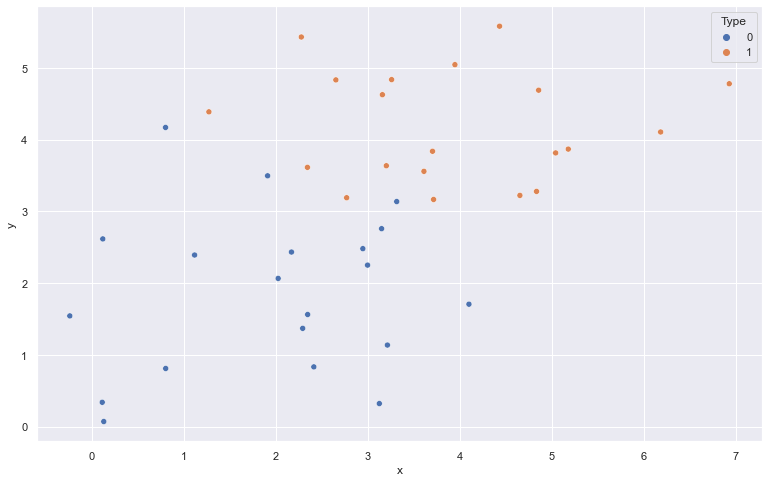

In [26]:
fig, ax = plt.subplots(figsize = (13, 8))
    
sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'Type', ax = ax)

In [55]:
class LogisticClassifier:
    
    def __init__(self, X, y):
        
        self.n, self.d = X.shape
        self.y = y
        
        #add a new column
        new = np.array([[1] * self.n]).T
        self.X = np.concatenate((X, new), axis = 1)
        self.w = np.random.random(self.d + 1)
    
    
    def _sigma(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _gradient_descent(self, w0, alpha = 0.3, epsilon = 0.1):
        
        p = self._sigma(self.X.dot(w0))
        
        w1 = w0 - alpha * self.X.T.dot(p - self.y) 
        
        
        while np.linalg.norm(w1 - w0) > epsilon:
            
            w0 = w1
            
            p = self._sigma(self.X.dot(w0))
            w1 = w0 - alpha * self.X.T.dot(p - self.y)
            
            
        return w0
    
    
    def fit(self):
        self.w = self._gradient_descent(self.w)
        
    def predict(self, X):
        new = np.array([[1] * self.n]).T
        X = np.concatenate((X, new), axis = 1)
        
        return np.round(self._sigma(X.dot(self.w)))

In [56]:
X = data.drop('Type', axis = 1).values
y = data['Type'].values

In [57]:
cls = LogisticClassifier(X, y)

In [58]:
cls.fit()

In [59]:
predinctions = cls.predict(X)

In [60]:
(y == predinctions).mean()

0.95

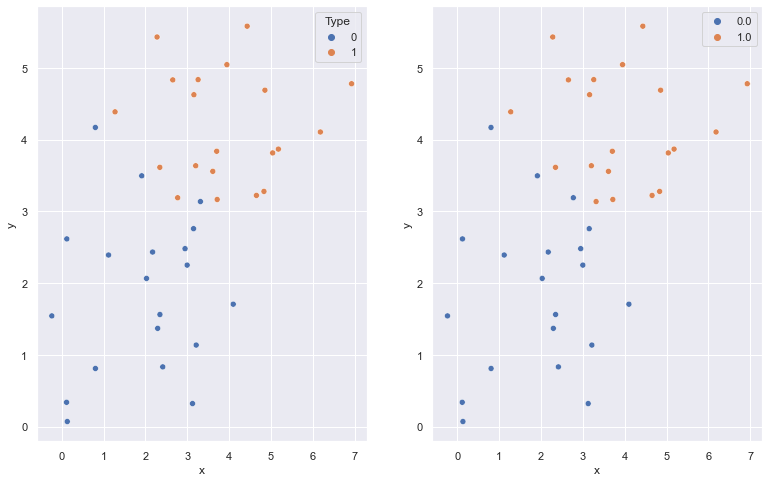

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (13, 8))

sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'Type', ax = ax[0])
sns.scatterplot(data = data, x = 'x', y = 'y', hue = predinctions, ax = ax[1]);

In [65]:
(y != predinctions).sum()

2

In [62]:
cls.w

array([  13.67676134,   28.26122491, -131.50334963])

$$w_1 x_1 + w_2 x_2 + w_0 = 0$$

In [63]:
def line(x):
    return -(cls.w[1] / cls.w[0]) * x  - (cls.w[2] / cls.w[0])

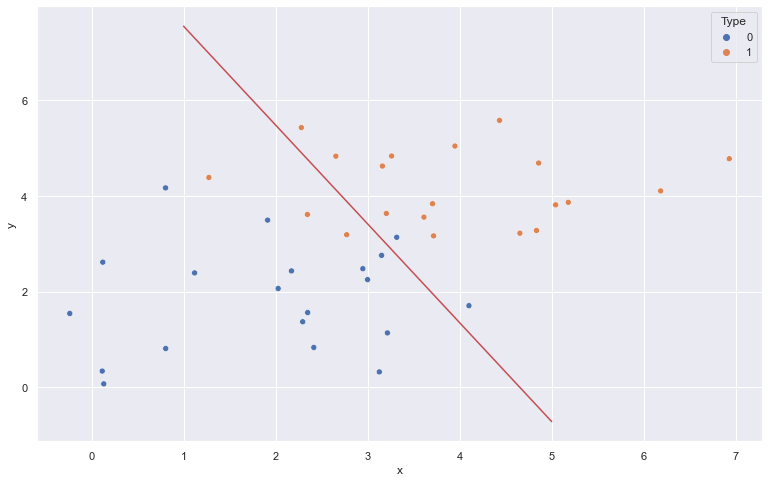

In [64]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(1, 5)
ax.plot(x, line(x), color = 'r')
sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'Type', ax = ax);

In [ ]:
fig, ax = plt.subplots(figsize = (13, 8))

x = np.linspace(1, 5)
ax.plot(x, line(x), color = 'r')
sns.scatterplot(data = data, x = 'x', y = 'y', hue = predinctions, ax = ax);